In [1]:
import pandas as pd 
import numpy as np  

import seaborn as sns 
import matplotlib.pyplot as plt  
df = pd.read_csv('data/diabetes.csv')
df.info()
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/diabetes.csv'

# Cleaning the Data

In [ ]:
#---check for null values---
print("Nulls")
print("=====")
print(df.isnull().sum())

Nulls
=====
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# There are no nulls. Next, let’s check for 0s:


#---check for 0s---
print("0s")
print("==")
print(df.eq(0).sum())

0s
==
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


# Examining the Correlation Between the Features

In [ ]:

corr = df.corr() 
print(corr)




                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

# Plotting the Correlation Between Features

C:\Users\Admin\AppData\Local\Temp\ipykernel_7480\3750161384.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(df.columns)


9


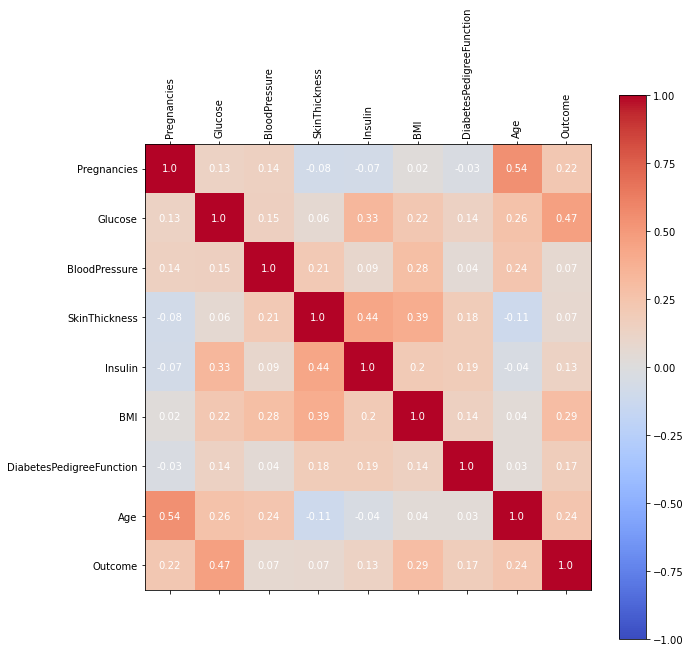

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
ax.set_xticklabels(df.columns)
plt.xticks(rotation = 90)
ax.set_yticklabels(df.columns)
ax.set_yticks(ticks)
#---print the correlation factor---
print(df.shape[1])
for i in range(df.shape[1]):
    for j in range(9):
        
        text = ax.text(j, i, round(corr.iloc[i][j],2),
            ha="center", va="center", color="w")
plt.show()

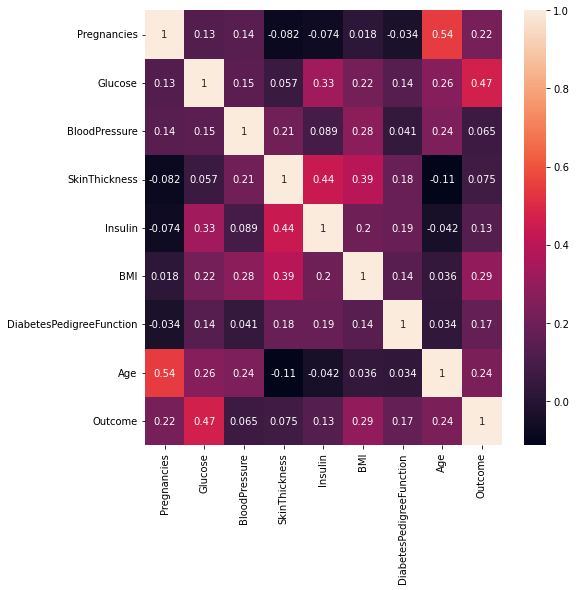

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)
#---get a reference to the current figure and set its size---
fig = plt.gcf()
fig.set_size_inches(8,8)

In [ ]:
#---get the top four features that has the hig
print(df.corr().nlargest(4, 'Outcome').index)

Index(['Outcome', 'Glucose', 'BMI', 'Age'], dtype='object')


In [ ]:
#---print the top 4 correlation values---
print(df.corr().nlargest(4, 'Outcome').values[:,8])

[1.         0.4665814  0.29269466 0.23835598]


# Evaluating the Algorithms


In [ ]:
#Logistic Regression

from sklearn import linear_model
from sklearn.model_selection import cross_val_score
#---features---
X = df[['Glucose','BMI','Age']]
#---label---
y = df.iloc[:,8]
log_regress = linear_model.LogisticRegression()
log_regress_score = cross_val_score(log_regress, X, y, cv=10,
scoring='accuracy').mean()
print(log_regress_score)

0.765704032809296


In [ ]:
result = []
result.append(log_regress_score)

In [ ]:
#K-Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier
#---empty list that will hold cv (cross-validates) scores---
cv_scores = []
#---number of folds---
folds = 10
#---creating odd list of K for KNN---
ks = list(range(1,int(len(X) * ((folds - 1)/folds)), 2))
#---perform k-fold cross validation---
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=folds, scoring='accuracy').mean()
    cv_scores.append(score)
#---get the maximum score---
knn_score = max(cv_scores)
#---find the optimal k that gives the highest score---
optimal_k = ks[cv_scores.index(knn_score)]
print(f"The optimal number of neighbors is {optimal_k}")
print(knn_score)
result.append(knn_score)

The optimal number of neighbors is 19
0.7669514695830485


In [ ]:
# Support Vector Machines

from sklearn import svm
linear_svm = svm.SVC(kernel='linear')
linear_svm_score = cross_val_score(linear_svm, X, y,
cv=10, scoring='accuracy').mean()
print(linear_svm_score)
result.append(linear_svm_score)

0.7630724538619276


In [ ]:
rbf = svm.SVC(kernel='rbf')
rbf_score = cross_val_score(rbf, X, y, cv=10, scoring='accuracy').mean()
print(rbf_score)
result.append(rbf_score)

0.7617908407382091


In [ ]:
algorithms = ["Logistic Regression", "K Nearest Neighbors", "SVM Linear Kernel", "SVM RBF Kernel"]
cv_mean = pd.DataFrame(result,index = algorithms)
cv_mean.columns=["Accuracy"]
cv_mean.sort_values(by="Accuracy",ascending=False)

,Accuracy
K Nearest Neighbors,0.766951
Logistic Regression,0.765704
SVM Linear Kernel,0.763072
SVM RBF Kernel,0.761791


In [ ]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=19)

In [ ]:
import pickle
#---save the model to disk---
filename = 'diabetes.sav'
#---write to the file using write and binary mode---
pickle.dump(knn, open(filename, 'wb'))

In [ ]:
#---load the model from disk---
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
Glucose = 65
BMI = 70
Age = 50
prediction = loaded_model.predict([[Glucose, BMI, Age]])
print(prediction)
if (prediction[0]==0):
    print("Non-diabetic")
else:
    print("Diabetic")

[0]
Non-diabetic


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
proba = loaded_model.predict_proba([[Glucose, BMI, Age]])
print(proba)
print("Confidence: " + str(round(np.amax(proba[0]) * 100 ,2)) + "%")

[[0.94736842 0.05263158]]
Confidence: 94.74%


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# Deploying the Model

In [ ]:
import pickle
from flask import Flask, request, json, jsonify
import numpy as np
app = Flask(__name__)
#---the filename of the saved model---
filename = 'diabetes.sav'
#---load the saved model---
loaded_model = pickle.load(open(filename, 'rb'))
@app.route('/diabetes/v1/predict', methods=['POST'])
def predict():
    #---get the features to predict---
    features = request.json
    #---create the features list for prediction---
    features_list = [features[a"Glucose"],
    features["BMI"],
    features["Age"]]
    #---get the prediction class---
    prediction = loaded_model.predict([features_list])
    #---get the prediction probabilities---
    confidence = loaded_model.predict_proba([features_list])
    #---formulate the response to return to client---
    response = {}
    response['prediction'] = int(prediction[0])
    response['confidence'] = str(round(np.amax(confidence[0]) * 100 ,2))
    return jsonify(response)
if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)

ImportError: cannot import name 'escape' from 'jinja2' (C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\jinja2\__init__.py)